# Vorhersage von Diamantenpareisen | Nils Steiner

## Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model, tree, metrics, neighbors, svm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

## Datenauswahl

### Datenset einlesen per pandas. (.csv kommt von GitHub *Repository*)

In [2]:
url = 'https://raw.githubusercontent.com/isnteer-sluz/Vorhersage-von-Diamantenpreisen/refs/heads/main/DataSet.csv'
diamond_prices = pd.read_csv(url)

diamond_prices.head(1)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43


### Datensatz Spaltenbeschreibung

#### Unnamed: 0 (numerische Variable)

Die Spalte 'Unnamed: 0' ist wahrscheinlich ein automatisch generierter Wert, der unnötig ist. Diese Spalte werde ich vermutlich zu einem späteren Zeitpunkt entfernen. Der Datentyp der Variable ist 'int64'.

In [3]:
print(diamond_prices['Unnamed: 0'])
print(diamond_prices['Unnamed: 0'].dtype)

0            1
1            2
2            3
3            4
4            5
         ...  
53938    53939
53939    53940
53940    53941
53941    53942
53942    53943
Name: Unnamed: 0, Length: 53943, dtype: int64
int64


#### carat numerische Variable

Die Spalte gibt an, welches Karat der Diamant hat. Ich nehme an, dass dieser Wert stark mit dem Preis korreliert. Diese Variable werde ich wahrscheinlich als Feature verwenden, um den Preis des Diamanten zu bestimmen. Der Datentyp der Variable ist 'float64'.

In [4]:
print(diamond_prices.carat)
print(diamond_prices.carat.dtype)

0        0.23
1        0.21
2        0.23
3        0.29
4        0.31
         ... 
53938    0.86
53939    0.75
53940    0.71
53941    0.71
53942    0.70
Name: carat, Length: 53943, dtype: float64
float64


#### cut (kategoriale Variable)

Die Spalte gibt den Schliff des Diamanten an. Die möglichen Werte sind 'Ideal', 'Premium', 'Very Good', 'Good' und 'Fair'. Diese werde ich wahrscheinlich ebenfalls als Feature verwenden, um den Preis zu bestimmen. Um sie jedoch nutzen zu können, muss ich die Werte zuerst durch Nummern ersetzen. Der Datentyp der Spalte ist 'object'.

In [5]:
print(diamond_prices.cut)
print(diamond_prices.cut.dtype)

0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53938      Premium
53939        Ideal
53940      Premium
53941      Premium
53942    Very Good
Name: cut, Length: 53943, dtype: object
object


#### color (kategoriale Variable)

Die Spalte gibt an, welche Farbe der Diamant auf der Farbskala hat. Die Farbskala reicht von D bis J. Ich nehme an, dass diese Spalte ebenfalls einen Einfluss auf den Preis hat, jedoch vermutlich nicht so gross wie zum Beispiel das 'Karat' oder der 'Schliff'. Falls ich die Spalte verwende, müsste ich sie ebenfalls in Zahlen umwandeln. Der Datentyp der Spalte ist 'object'.

In [6]:
print(diamond_prices.color)
print(diamond_prices.color.dtype)

0        E
1        E
2        E
3        I
4        J
        ..
53938    H
53939    D
53940    E
53941    F
53942    E
Name: color, Length: 53943, dtype: object
object


#### clarity (kategoriale Variable)

Die Spalte 'clarity' gibt an, wie klar der Diamant ist. Typische Werte sind 'IF' (internally flawless), 'VVS1', 'VVS2' (very very slightly included), 'VS1', 'VS2' (very slightly included), 'SI1', 'SI2' (slightly included) und 'I1' (included). Die Spalte hat wahrscheinlich ebenfalls einen Einfluss auf den Preis des Diamanten. Der Datentyp der Spalte ist 'object'.

In [7]:
print(diamond_prices.clarity)
print(diamond_prices.clarity.dtype)

0        SI2
1        SI1
2        VS1
3        VS2
4        SI2
        ... 
53938    SI2
53939    SI2
53940    SI1
53941    SI1
53942    VS2
Name: clarity, Length: 53943, dtype: object
object


#### depth (numerische Variable)

Die Spalte 'depth' beschreibt die Gesamttiefe des Diamanten. Je tiefer der Diamant ist, desto mehr funkelt er, wodurch die Tiefe den Preis beeinflusst. Der Datentyp der Spalte ist 'float64'.

In [8]:
print(diamond_prices.depth)
print(diamond_prices.depth.dtype)

0        61.5
1        59.8
2        56.9
3        62.4
4        63.3
         ... 
53938    61.0
53939    62.2
53940    60.5
53941    59.8
53942    60.5
Name: depth, Length: 53943, dtype: float64
float64


#### table (numerische Variable)

Die Spalte 'table' gibt an, wie gross die Oberfläche des Diamanten ist. Daher hat diese Spalte wahrscheinlich ebenfalls einen grossen Einfluss auf den Preis. Der Datentyp der Spalte ist 'float64'.

In [9]:
print(diamond_prices.table)
print(diamond_prices.table.dtype)

0        55.0
1        61.0
2        65.0
3        58.0
4        58.0
         ... 
53938    58.0
53939    55.0
53940    55.0
53941    62.0
53942    59.0
Name: table, Length: 53943, dtype: float64
float64


#### price (numerische Variable)

Die Spalte 'price' gibt den Preis des Diamanten an. Diese Spalte ist auch das Ziel, also 'Y'. Der Datentyp der Spalte ist 'int64'.

In [10]:
print(diamond_prices.price)
print(diamond_prices.price.dtype)

0         326
1         326
2         327
3         334
4         335
         ... 
53938    2757
53939    2757
53940    2756
53941    2756
53942    2757
Name: price, Length: 53943, dtype: int64
int64


#### x (numerische Variable)

Die Spalte 'x' gibt die Länge des Diamanten in Millimetern an. Der Datentyp der Spalte ist 'float64'.

In [11]:
print(diamond_prices.x)
print(diamond_prices.x.dtype)

0        3.95
1        3.89
2        4.05
3        4.20
4        4.34
         ... 
53938    6.15
53939    5.83
53940    5.79
53941    5.74
53942    5.71
Name: x, Length: 53943, dtype: float64
float64


y (numerische Variable)

Die Spalte 'y' gibt die Breite des Diamanten in Millimetern an. Der Datentyp der Spalte ist 'float64'.

In [12]:
print(diamond_prices.y)
print(diamond_prices.y.dtype)

0        3.98
1        3.84
2        4.07
3        4.23
4        4.35
         ... 
53938    6.12
53939    5.87
53940    5.74
53941    5.73
53942    5.76
Name: y, Length: 53943, dtype: float64
float64


#### z (numerische Variable)

Die Spalte 'z' gibt die Höhe des Diamanten in Millimetern an. Der Datentyp der Spalte ist 'float64'.

In [13]:
print(diamond_prices.z)
print(diamond_prices.z.dtype)

0        2.43
1        2.31
2        2.31
3        2.63
4        2.75
         ... 
53938    3.74
53939    3.64
53940    3.49
53941    3.43
53942    3.47
Name: z, Length: 53943, dtype: float64
float64


###

## Exploratory Data Analysis (EDA)

### Informationen über das Datensets sammeln

#### Shape ausgeben

In [14]:
diamond_prices.shape

(53943, 11)

In meinem Datenset habe ich 53'942 Dateneinträge und 11 Spalten.

#### Alle Spalten ausgeben mit den Datentypen

In [15]:
diamond_prices.dtypes

,0
Unnamed: 0,int64
carat,float64
cut,object
color,object
clarity,object
depth,float64
table,float64
price,int64
x,float64
y,float64


Wie ich hier sehe, muss ich wahrscheinlich die Spalten 'cut', 'color' und 'clarity' durch Zahlen ersetzen. (Bei der Spaltenbeschreibung sieht man, welche Kategorien diese Spalten haben.)

### Informationen über die Daten sammeln

#### NULL / NaN Werte

Null-Werte Herausfiltern.

In [16]:
diamond_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


Da es keine Nullwerte gibt, muss ich diese auch nicht bereinigen.

### Duplikate

Ich überprüfe, ob es Duplikate in meinem Datenset gibt. Falls duplizierte Datensätze vorhanden sind, würde ich diese löschen, da es sehr unwahrscheinlich ist, dass es komplett identische Diamanten gibt. Es handelt sich dabei eher um einen Fehler bei der Erstellung des Datensets als um ein natürliches Vorkommen von Diamanten.

In [17]:
diamond_prices.duplicated().sum()

0

Es gibt in meinem Datenset keine duplizierten Werte.

### Aussreisser erkennen

Um Ausreisser zu erkennen, werde ich ein Boxplot verwenden. So kann ich direkt sehen, ob es Ausreisser gibt.

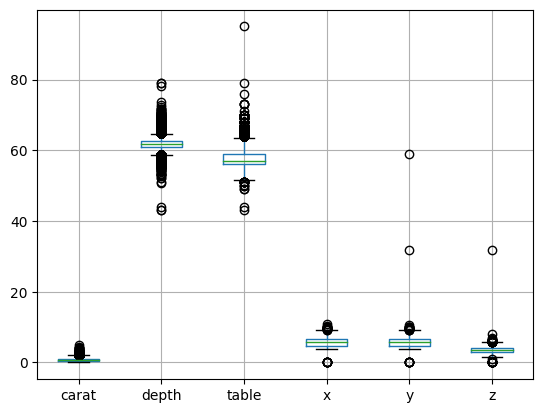

In [18]:
diamond_prices.boxplot(column=['carat', 'depth', 'table', 'x', 'y', 'z'])
plt.show()

Da der 'price' sehr hoch sein kann, habe ich ihn nicht in das Diagramm aufgenommen, da er es sonst verfälschen würde bzw. es nicht direkt verfälscht, aber die anderen Diagramme so skaliert, dass sie nicht mehr lesbar wären.

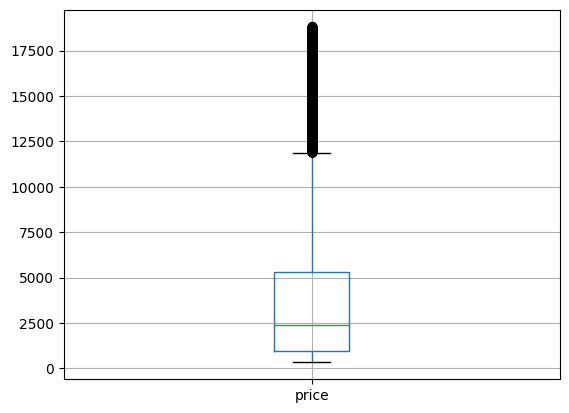

In [19]:
diamond_prices.boxplot(column=['price'])
plt.show()

Als ich die Diagramme zunächst betrachtet habe, ist mir aufgefallen, dass es doch sehr viele Ausreisser gibt. Allerdings stufe ich diese nicht als falsch ein, sondern gehe davon aus, dass diese Daten der Wahrheit entsprechen.

### Datentypen aufbereiten

Wie oben bereits erwähnt, werde ich die Spalten, die den Datentyp 'object' haben, in Zahlen umwandeln. Zuerst werde ich überprüfen, welche Kategorien die einzelnen Spalten enthalten.

In [20]:
diamond_prices.cut.value_counts()

,count
cut,
Ideal,21551
Premium,13793
Very Good,12083
Good,4906
Fair,1610


In [21]:
diamond_prices.color.value_counts()

,count
color,
G,11292
E,9799
F,9543
H,8304
D,6775
I,5422
J,2808


In [22]:
diamond_prices.clarity.value_counts()

,count
clarity,
SI1,13067
VS2,12259
SI2,9194
VS1,8171
VVS2,5066
VVS1,3655
IF,1790
I1,741


Alle Kategorien mit Zahlen ersetzten.

In [23]:
diamond_prices['cut_num'], unique_categories = pd.factorize(diamond_prices.cut)

In [24]:
diamond_prices['color_num'], unique_categories = pd.factorize(diamond_prices.color)

In [25]:
diamond_prices['clarity_num'], unique_categories = pd.factorize(diamond_prices.clarity)

Schauen ob es Funktioniert hat.

In [26]:
diamond_prices.head(1)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num,color_num,clarity_num
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0,0,0


Ich werde jetzt die Spalte 'Unnamed: 0' löschen, da sie nicht relevant ist.

In [27]:
diamond_prices = diamond_prices.drop(columns=['Unnamed: 0'])

### Daten analysieren

#### Korellationsmatrix erstellen

Ich habe eine Korrelationsmatrix erstellt, um zu sehen, welche Werte ich verwenden kann, um den Preis vorherzusagen. Anders gesagt, ich habe geprüft, welche Spalten ich als Features verwenden kann. Dafür musste ich mein bestehendes DataFrame in ein neues einlesen, sodass das neue DataFrame nur numerische Spalten enthält, da ich sonst keine Korrelationsmatrix erstellen kann.

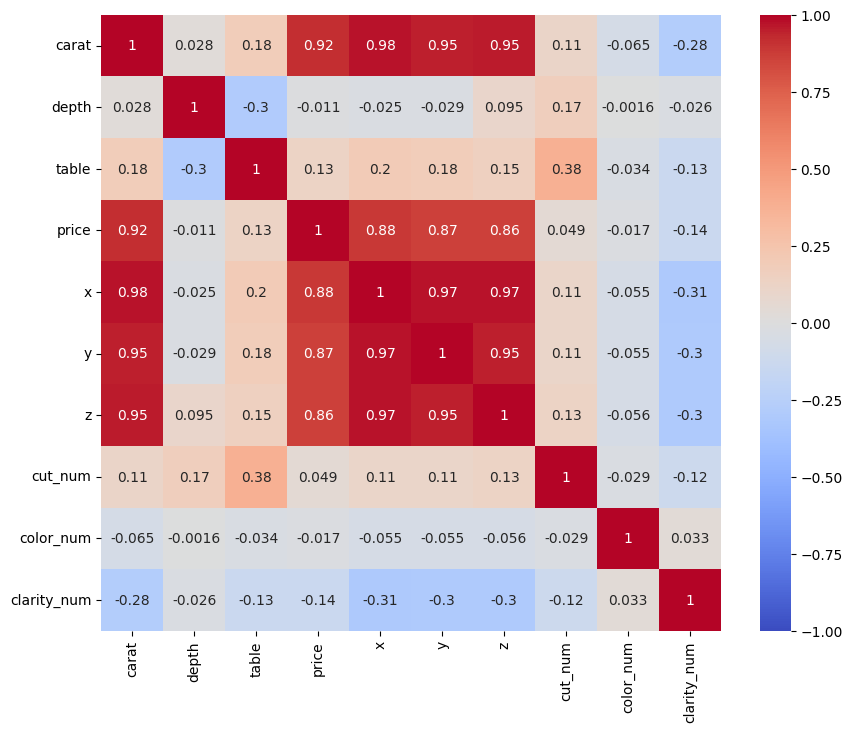

In [28]:
korrelationsmatrix_df = diamond_prices[['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_num', 'color_num', 'clarity_num']]

korrelationsmatrix = korrelationsmatrix_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(korrelationsmatrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.show()

#### Numerische Felder analysieren

Ich werde meinen Datensatz mithilfe der Methode .describe() analysieren.

In [29]:
diamond_prices.describe()

,carat,depth,table,price,x,y,z,cut_num,color_num,clarity_num
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730,1.228964,3.174314,2.256104
std,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679,1.265965,2.050193,1.766509
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,0.000000,1.000000,1.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,1.000000,4.000000,2.000000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000,3.000000,5.000000,3.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,4.000000,6.000000,7.000000


Alle Spalten mithilfe eines Boxplot ausgeben.

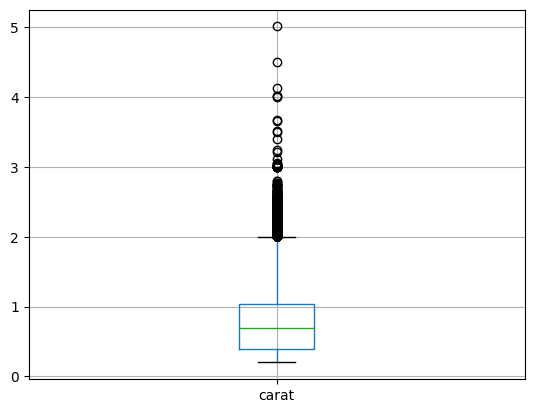

In [30]:
diamond_prices.boxplot(column=['carat'])
plt.show()

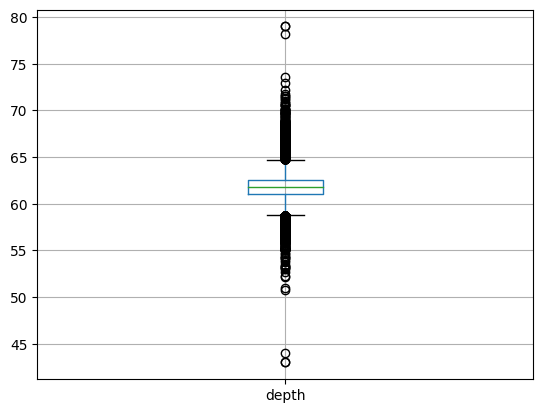

In [31]:
diamond_prices.boxplot(column=['depth'])
plt.show()

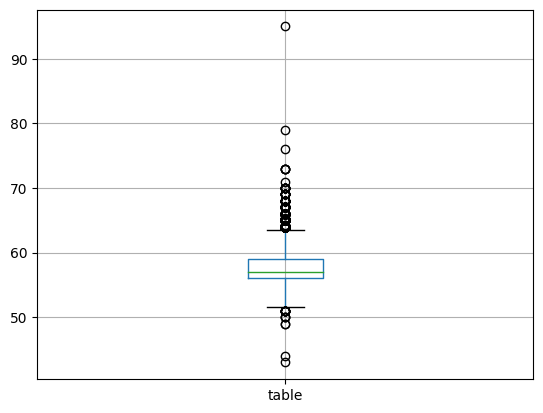

In [32]:
diamond_prices.boxplot(column=['table'])
plt.show()

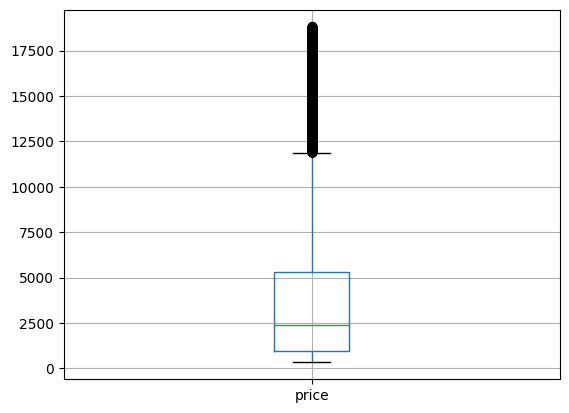

In [33]:
diamond_prices.boxplot(column=['price'])
plt.show()

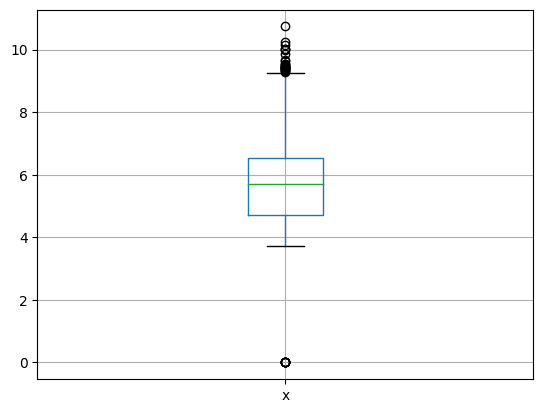

In [34]:
diamond_prices.boxplot(column=['x'])
plt.show()

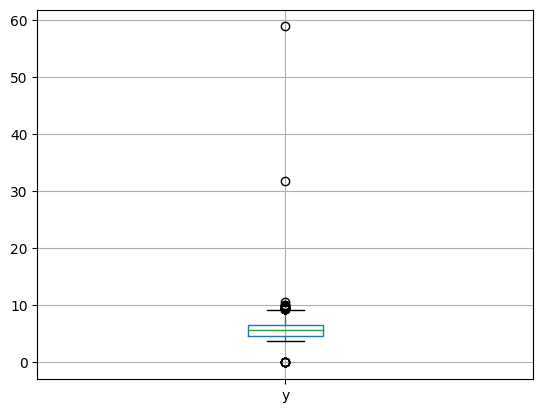

In [35]:
diamond_prices.boxplot(column=['y'])
plt.show()

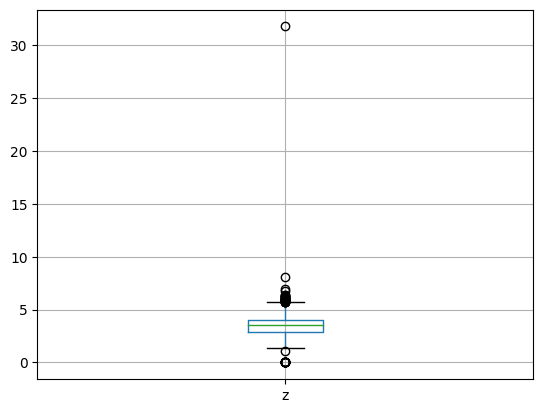

In [36]:
diamond_prices.boxplot(column=['z'])
plt.show()

Mir ist zunächst nichts Verdächtiges aufgefallen, jedoch habe ich zu einem späteren Zeitpunkt festgestellt, dass die Ausreisser in den Spalten 'z' und 'y' nicht normal sein können.

#### Kategorische Felder Analysieren

Ich werde überprüfen, wie viele Diamanten denselben 'cut' haben.

In [37]:
diamond_prices.cut.value_counts()

,count
cut,
Ideal,21551
Premium,13793
Very Good,12083
Good,4906
Fair,1610


Ich werde überprüfen, wie viele Diamanten dieselbe 'color' haben.

In [38]:
diamond_prices.color.value_counts()

,count
color,
G,11292
E,9799
F,9543
H,8304
D,6775
I,5422
J,2808


Ich werde überprüfen, wie viele Diamanten dieselbe 'clarity' haben.

In [39]:
diamond_prices.clarity.value_counts()

,count
clarity,
SI1,13067
VS2,12259
SI2,9194
VS1,8171
VVS2,5066
VVS1,3655
IF,1790
I1,741


### EDA Zusammenfassung

Ich konnte aus der EDA Wertvolle Informationen gewinnen. Wie zum beispiel das der Schliff, Farbe und Durchsichtigkeit fasst keinen einfluss auf den Preis des Diamanten hat. Dies hat mich erstaunt. Ich hätte gedacht (wie man aus der Spaltenbeschreibung entnehmen kann) das diese auch eine Korrelation hat mit dem Preis.

Dazu konnte ich der Tabelle entnehmen das der Preis (Ziel) eine sehr Starke Korrelation mit der grösse (x, y, z) und dem Karat hat. Diese werde ich vermutlich für meine Hypothesen verwenden.

## Hypothesen

### Hypothesen aufstellen

1. **Hypothese 1**  
   - Je höher das Gewicht eines Diamanten (carat), desto höher ist der Preis (price) des Diamanten. (Positive Korrelation)

2. **Hypothese 2**  
   - Je grösser der Diamant (x, y, z), desto höher ist der Preis (price). (Positive Korrelation)

3. **Hypothese 3**  
   - Je besser die Klarheit (clarity_num), desto höher ist der Preis (price). (Nahezu keine Korrelation)

### Hypothesen belegen (Diagramme)

#### Hypothese 1

Ich werde ein Scatterplot verwenden, um die Korrelation zwischen den zwei Variablen zu veranschaulichen.

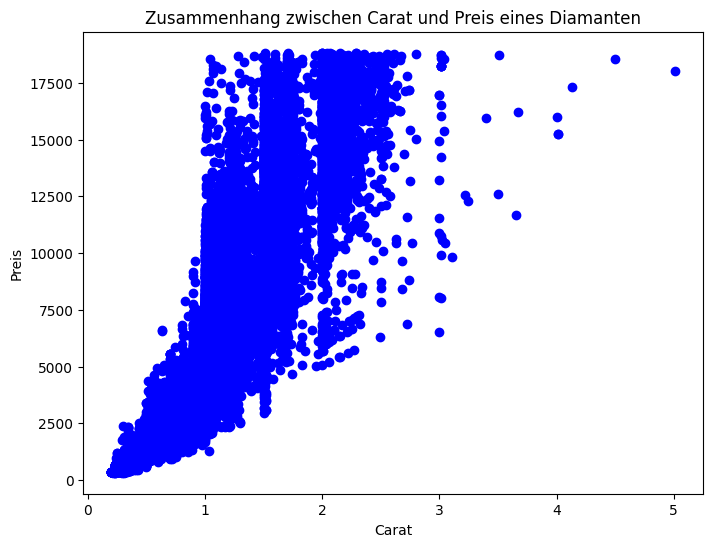

In [40]:
plt.figure(figsize=(8,6))
plt.scatter(diamond_prices['carat'], diamond_prices['price'], color='blue')

plt.title('Zusammenhang zwischen Carat und Preis eines Diamanten')
plt.xlabel('Carat')
plt.ylabel('Preis')

plt.show()

Man kann klar erkennen, dass der Preis des Diamanten steigt, wenn das Karat zunimmt. Diese Hypothese stimmt also.

#### Hypothese 2

Da ich gesehen habe, dass die x-, y- und z-Werte eine starke Korrelation mit dem Preis haben, werde ich aus diesen drei Werten die Grösse, des Diamanten berechnen und diese dann mit dem Preis vergleichen.

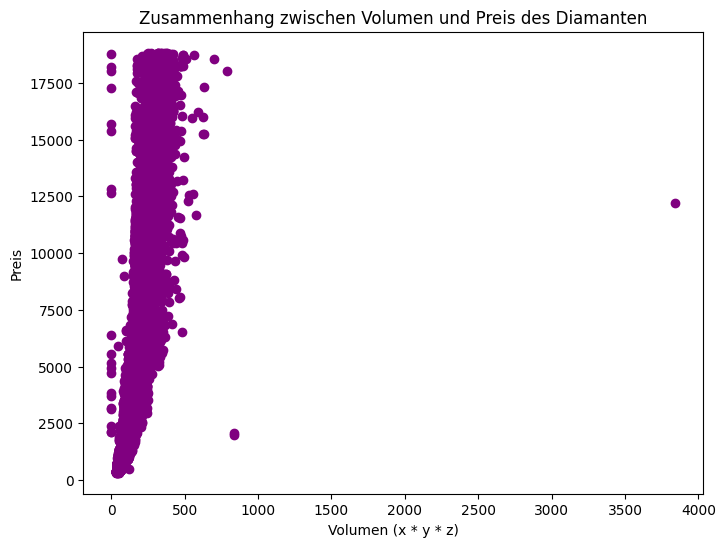

In [41]:
plt.figure(figsize=(8,6))
plt.scatter(diamond_prices['x'] * diamond_prices['y'] * diamond_prices['z'], diamond_prices['price'], color='purple')

plt.title('Zusammenhang zwischen Volumen und Preis des Diamanten')
plt.xlabel('Volumen (x * y * z)')
plt.ylabel('Preis')

plt.show()

Mir ist aufgefallen, dass ein Punkt ein sehr grosses Volumen hat. Daher werde ich versuchen, den entsprechenden Datensatz zu finden und überprüfen, ob dieser korrekt sein kann.

In [42]:
diamond_prices['volume'] = diamond_prices['x'] * diamond_prices['y'] * diamond_prices['z']

gefilterte_daten = diamond_prices[diamond_prices['volume'] > 3000]

gefilterte_daten

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num,color_num,clarity_num,volume
24067,2.0,Premium,H,SI2,58.9,57.0,12210,8.09,58.9,8.06,1,3,0,3840.59806


Ich glaube nicht, dass dieser Diamant existieren kann, da auch die anderen Daten keinen Sinn ergeben, vor allem, weil er trotz des grossen Volumens einen sehr tiefen Preis hat. Deshalb werde ich diesen Datensatz entfernen. Da ich aus der vorherigen Abfrage weiss, dass der betroffene Datensatz die ID 24067 hat, kann ich ihn einfach droppen.

In [43]:
diamond_prices = diamond_prices.drop(index=24067)

Jetzt habe ich bemerkt, dass es viele Diamanten gibt, die gar keine Grösse haben. Deshalb werde ich diese ebenfalls entfernen.

In [44]:
gefilterte_daten = diamond_prices[diamond_prices['volume'] == 0]

diamond_prices = diamond_prices.drop(gefilterte_daten.index)

Nach all diesen Anpassungen habe ich das Diagramm nochmals ausgeführt, und jetzt ist es klarer. Die Hypothese 2 stimmt.

#### Hypothese 3

Ich nehme an, dass die 'clarity_num' eine starke Korrelation mit dem Preis hat. Das Korrelationsdiagramm hat jedoch etwas anderes gezeigt, deshalb möchte ich dies nochmals überprüfen.

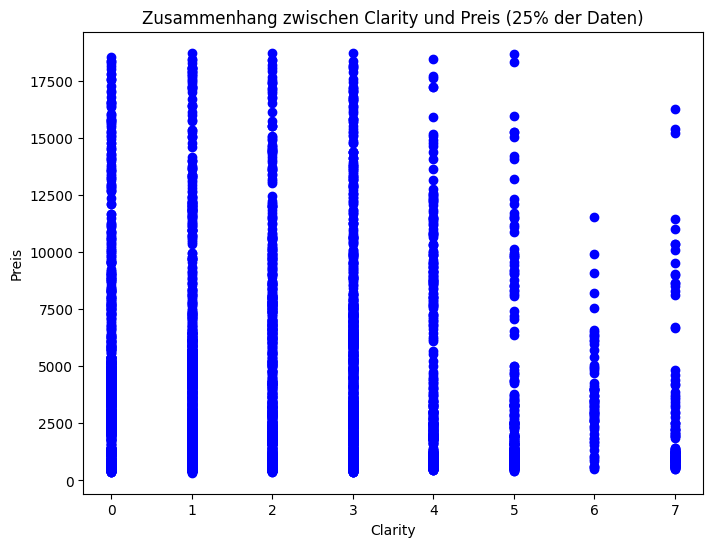

In [45]:
sampled_data = diamond_prices.sample(frac=0.1, random_state=1)

plt.figure(figsize=(8,6))
plt.scatter(sampled_data['clarity_num'], sampled_data['price'], color='blue')

plt.title('Zusammenhang zwischen Clarity und Preis (25% der Daten)')
plt.xlabel('Clarity')
plt.ylabel('Preis')

plt.show()

Man kann eine kleine Korrelation sehen, aber wahrscheinlich werde ich diese nicht verwenden, da sie, wie bereits erwähnt, eine viel zu niedrige Korrelation aufweist. Es gibt bessere Variablen. Deshalb würde ich sagen, dass Hypothese 3 nur teilweise stimmt, da sie nur minimal zum Preis beiträgt.

## Modelle

### Datensatz aufbereiten mit Test und Futures. (80 / 20 Split)

In [46]:
X = diamond_prices[['carat', 'volume']]
Y = diamond_prices.price

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

### Modell 1 Lineare Regression

#### Modell erstellen

Für das erste Modell werde ich ein Regressionsmodell verwenden. Genauer gesagt werde ich ein LinearRegression-Modell erstellen.

In [60]:
reg_lin = linear_model.LinearRegression()
reg_lin.fit(X_train, Y_train)

LinearRegression()

In [48]:
Y_predict = reg_lin.predict(X_test)

Nachdem das Modell trainiert wurde und die Vorhersagen (Y_predict) erstellt wurden, werde ich diese nun nebeneinander aufstellen, um zu sehen, ob es funktioniert hat.

#### Modell 1 Auswertung

In [49]:
pd.DataFrame([Y_predict, Y_test]).transpose()

,0,1
0,3217.869696,2364.0
1,3446.103633,2596.0
2,13934.415283,14298.0
3,181.636314,704.0
4,308.708724,893.0
...,...,...
10780,14684.108889,11756.0
10781,3586.861073,2831.0
10782,4693.017120,4158.0
10783,7242.054312,4789.0


In [50]:
mse = metrics.mean_squared_error(Y_test, Y_predict)
"MSE={}, R2={}".format(mse, metrics.r2_score(Y_test, Y_predict))

'MSE=2315104.13305216, R2=0.8458701944571618'

Das erste Modell ist tatsächlich ein sehr starkes Modell, da der R²-Wert 0,84 beträgt, was ein sehr guter Wert ist.

### Modell 2: SVR mit linearem Kernel

#### Modell erstellen

In [56]:
svr_linear = SVR(kernel='linear')

svr_linear.fit(X_train, Y_train)

y_predict_linear = svr_linear.predict(X_test)

#### Modell Auswertung

In [ ]:
pd.DataFrame([Y_predict, Y_test]).transpose()

In [53]:
mse = metrics.mean_squared_error(Y_test, Y_predict)
"MSE={}, R2={}".format(mse, metrics.r2_score(Y_test, Y_predict))

          Model           MSE  R2 Score
0  SVR (Linear)  2.590493e+06  0.827536


### Modell 3

#### Modell erstellen

In [59]:
svr_rbf = SVR(kernel='rbf')

svr_rbf.fit(X_train, Y_train)

y_pred_rbf = svr_rbf.predict(X_test)

#### Modell Auswertung

In [57]:
pd.DataFrame([Y_predict, Y_test]).transpose()

,0,1
0,3217.869696,2364.0
1,3446.103633,2596.0
2,13934.415283,14298.0
3,181.636314,704.0
4,308.708724,893.0
...,...,...
10780,14684.108889,11756.0
10781,3586.861073,2831.0
10782,4693.017120,4158.0
10783,7242.054312,4789.0


In [58]:
mse = metrics.mean_squared_error(Y_test, Y_predict)
"MSE={}, R2={}".format(mse, metrics.r2_score(Y_test, Y_predict))

'MSE=2315104.13305216, R2=0.8458701944571618'

### Modell Zusammenfassung

Aus all den erstellten Modellen konnte ich erkennen, dass sie einen ähnlichen R²-Wert von etwa 0,84 aufweisen, was einer Genauigkeit von 84 % entspricht. Wenn ich mich für ein Modell entscheiden müsste, wäre es wahrscheinlich das erste Modell, die lineare Regression. Es hat eine deutlich schnellere Fitting-Zeit, benötigt in der Regel weniger als 1 Sekunde, während Modell 2 und 3 etwa 3 Minuten in Anspruch nehmen. Da die Diamantenpreise stark schwanken und eng mit Währungsschwankungen verbunden sind, halte ich Modell 1 für die beste Wahl, da es einfach und schnell auf neue Daten trainiert werden kann.

## Zusammenfassung

### Zusammenfassung der Resultate

Die ursprüngliche Aufgabe war, 'ein Modell zu entwickeln, das den Preis der Diamanten anhand der bekannten Merkmale möglichst genau vorhersagen kann'. Ich habe dies so gelöst, dass ich mir bei der EDA anhand der Korrelationsmatrix angeschaut habe, wie die einzelnen Variablen zusammenhängen. Danach habe ich gesehen, dass die Grösse (also x, y und z) und das Karat des Diamanten eine sehr grosse Abhängigkeit vom Preis haben, also habe ich die Grösse und das Karat als Features gewählt. Ich habe die Grösse bzw. das Volumen aus x, y und z berechnet und als eigene Spalte dem DataFrame hinzugefügt. Danach ist mir bei der Hypothesenaufstellung aufgefallen, dass es ein paar kleinere Fehler im Datenset gibt. Zum Beispiel gab es mehrere Diamanten, die ein Volumen von 0 hatten; diese habe ich bereinigt. Zudem gab es einen Diamanten mit einem sehr grossen Gewicht, der aber einen sehr tiefen Preis hatte. Das erschien mir etwas seltsam, daher habe ich ihn gelöscht. Danach habe ich drei Modelle trainiert und geschaut, welches den besten R²-Score hat, und das wurde dann mein finales Modell.

### Einsatzfähigkeit des Modells

Das Modell könnte man warscheindlich obwohl es eigentlich gute vorhersagen macht nicht einsetzten weil das Modell keine Echtzeit Daten und nicht den Wechselkurs von der Währung weiss. Man müsste das Modell warscheindlich mit Echtzeit Daten oder an eine Aktuelle Diamanten Datenbase angehänkt ist. Dazu konnte man den Algorithmus an ein Currency Excange Datenbank anhänken so das er auch die Wechselkurse einbeziehen könnte. Also die Probleme die auftreten könnten sind zum beispiel das er eine Komplett falsche Aussage trifft weil er nur auf Statischen Daten Trainiert ist

### Performance Verbessern

Man könnte eventuell noch andere Algorithmen oder Modelle entwickeln und das Modell mit Echtzeitdaten verbessern. Dadurch könnte sichergestellt werden, dass die Diamantenpreise nicht veraltet sind und dem Juwelier stets den besten Preis angezeigt wird. Wenn man zum Beispiel den Wechselkurs einbeziehen würde, könnte man sicherstellen, dass auch Inflation oder eine Wirtschaftskrise in die Preisberechnung einfliessen.